# Project: Ford GoBike Trip



<a id='wrangling'></a>
## 1- Preliminary Wrangling

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# load in the dataset into a pandas dataframe, print statistics
df_main = pd.read_csv('201902-fordgobike-tripdata.csv')

In [12]:
## Copy the dataset
df = df_main.copy()


In [13]:
df = df.rename(columns={"duration_sec": "duration_hour"})
df.duration_hour = df.duration_hour / 3600
df.duration_hour = df.duration_hour.round(decimals=2)
df

,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,14.50,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,11.81,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,17.18,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,10.14,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,0.44,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,0.13,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,0.09,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,0.04,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,0.04,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [14]:
## Drop Nan Values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_hour            174952 non-null  float64
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [15]:
## Drop member_birth_year values less than 1900 (as verified oldest person age is 122 year ) .
df = df.loc[df.member_birth_year  > 1900 ]
b = pd.Series(df['member_birth_year'].unique()).sort_values()
b

63    1901.0
69    1902.0
70    1910.0
60    1920.0
72    1927.0
       ...  
15    1997.0
26    1998.0
29    1999.0
17    2000.0
62    2001.0
Length: 73, dtype: float64

In [16]:
## Get the age of the users then drop usage year column used to get user_age .
df['usage_year'] = pd.DatetimeIndex(df['start_time']).year
df['user_age'] =  df['usage_year'] - df['member_birth_year']

df['user_age'] = df['user_age'].astype(int)
df['member_birth_year'] = df['member_birth_year'].astype(int)

c = pd.Series(df['user_age'].unique()).sort_values()
df.drop(['usage_year'], axis='columns', inplace=True)

print(c)

62     18
17     19
29     20
26     21
15     22
     ... 
72     92
60     99
70    109
69    117
63    118
Length: 73, dtype: int32


In [17]:
## Change columns type : 
## (start_time , end_time ) to datetime64 .
## (start_station_id , end_station_id , user_age) to int64 .
## (start_station_name , end_station_name, bike_id , user_type , member_birth_year , member_gender ) to category .
## (bike_share_for_all_trip) to boolean .

convert_dict = {'start_time': 'datetime64',
                'end_time': 'datetime64',
                'start_station_id': 'int64',
                'end_station_id': 'int64',
                'user_age': 'int64',
                'start_station_name': 'category',
                'end_station_name': 'category',
                'bike_id': 'category',
                'user_type': 'category',
                'member_birth_year': 'category',
                'member_gender': 'category',
                'bike_share_for_all_trip': bool
               }

df = df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174898 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_hour            174898 non-null  float64       
 1   start_time               174898 non-null  datetime64[ns]
 2   end_time                 174898 non-null  datetime64[ns]
 3   start_station_id         174898 non-null  int64         
 4   start_station_name       174898 non-null  category      
 5   start_station_latitude   174898 non-null  float64       
 6   start_station_longitude  174898 non-null  float64       
 7   end_station_id           174898 non-null  int64         
 8   end_station_name         174898 non-null  category      
 9   end_station_latitude     174898 non-null  float64       
 10  end_station_longitude    174898 non-null  float64       
 11  bike_id                  174898 non-null  category      
 12  user_type       

In [18]:
df.reset_index(drop=True)

,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age
0,14.50,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,True,35
1,17.18,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,True,47
2,10.14,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,True,30
3,0.44,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True,45
4,0.50,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,True,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174893,0.13,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,True,23
174894,0.09,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,True,35
174895,0.04,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,True,29
174896,0.04,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,True,31


In [19]:
## The most 15 start &end stations that have high customers density 
start_st = df['start_station_name'].value_counts()[:15].index
end_st = df['end_station_name'].value_counts()[:15].index

df_15 = df.loc[(df['start_station_name'].isin(start_st)) & (df['end_station_name'].isin(end_st))]
df_15 = df_15.reset_index(drop=True)
df_15.head()

,duration_hour,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age
0,0.11,2019-02-28 23:49:24.399,2019-02-28 23:55:50.284,6,The Embarcadero at Sansome St,37.804770,-122.403234,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6531,Customer,2000,Male,True,19
1,0.15,2019-02-28 22:58:06.628,2019-02-28 23:07:09.508,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1936,Subscriber,1995,Male,True,24
2,0.10,2019-02-28 23:00:05.223,2019-02-28 23:06:21.515,58,Market St at 10th St,37.776619,-122.417385,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,5731,Subscriber,1982,Male,True,37
3,0.09,2019-02-28 22:48:04.158,2019-02-28 22:53:29.926,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5012,Subscriber,1990,Male,True,29
4,1.39,2019-02-28 21:22:51.632,2019-02-28 22:46:10.114,6,The Embarcadero at Sansome St,37.804770,-122.403234,16,Steuart St at Market St,37.794130,-122.394430,5149,Customer,1987,Male,True,32


### Investigation Overview
I will investigate the data in the locations that have the most density as this will help in marketing specially in ( customer targeting & offers ) to increase sales .

### Dataset Overview
There are 174,898 trips recorded with complete data in the dataset , these data divided to four dimensions ( trip time , start and end location , bike data and user data ).
the data differ between numeric and categorical .


#### What are  most 15 start & end stations that have high customers density ?

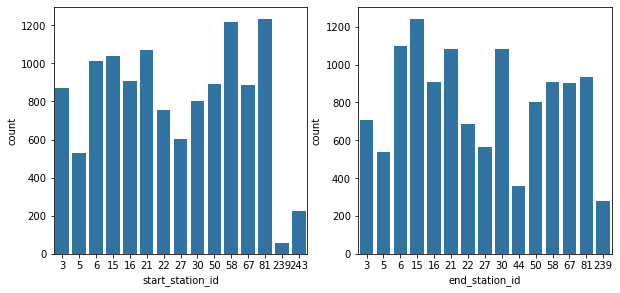

In [20]:
## The most 15 start &end stations that have high customers density 
plt.figure(figsize = [10, 10])
base_color = sb.color_palette()[0]

plt.subplot (2,2,1)
sb.countplot(data=df_15, x='start_station_id', color=base_color);

plt.subplot (2,2,2)
freq_b = df_15['end_station_id'].value_counts()
gen_order_b = freq_b.index
sb.countplot(data=df_15, x='end_station_id', color=base_color);

#### What are customers characteristics ?

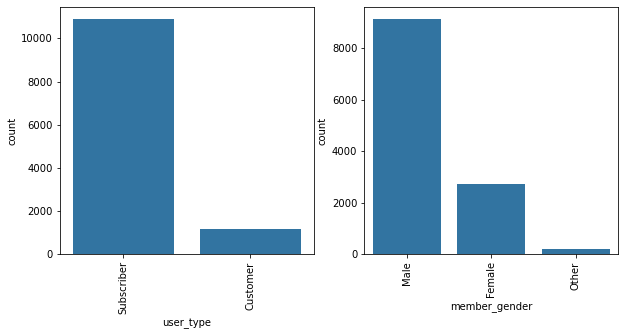

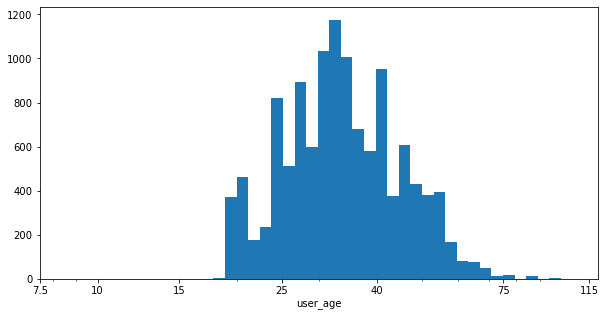

In [21]:
## The user related data (user_type ,member_gender ) for most 15 start and end stations that have high density.
plt.figure(figsize = [10, 10])
base_color = sb.color_palette()[0]


plt.subplot (2,2,1)
freq_e = df_15['user_type'].value_counts()
gen_order_e = freq_e.index  
sb.countplot(data=df_15, x='user_type', color=base_color, order=gen_order_e) ;
plt.xticks(rotation=90)


plt.subplot (2,2,2)
freq_f = df_15['member_gender'].value_counts()
gen_order_f = freq_f.index  
sb.countplot(data=df_15, x='member_gender', color=base_color, order=gen_order_f);
plt.xticks(rotation=90)


log_binsize = 0.025
bins = 10 ** np.arange(0.5, np.log10(df_15['user_age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_15, x = 'user_age', bins = bins)
plt.xscale('log')
plt.xticks([7.5 ,10, 15, 25, 40, 75 , 115 ], [7.5 ,10, 15, 25, 40, 75 , 115 ])
plt.xlim((7.5,120))
plt.xlabel('user_age')
plt.show()


#### Customers characteristics 
The users characterisitics in common even in all locations or the most density ( Type : Subscribers , Gender : Male , Age : from 20 to 40 )

### What is the common trip duration ?

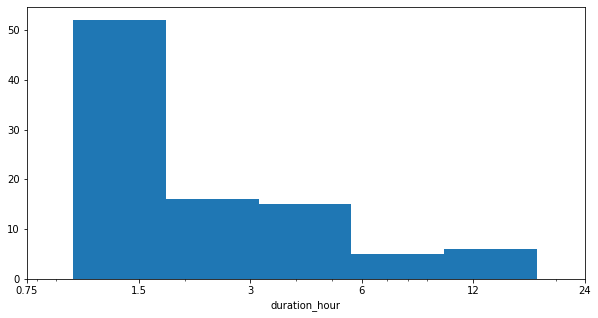

In [31]:
log_binsize = 0.25
bins = 10 ** np.arange(0, np.log10(df_15['duration_hour'].max())+log_binsize, log_binsize)


plt.figure(figsize=[10, 5])
plt.hist(data = df_15, x = 'duration_hour', bins = bins)
plt.xscale('log')
plt.xticks([0.75 ,1.5,3,6,12,24], [0.75 ,1.5,3,6,12,24])
plt.xlabel('duration_hour')
plt.show()

### Conclusion
As conclusion our Target customer characterisitics  ( Type : Subscribers then customers , Gender : Male then female , Age : from 20 to 40 ) and the common duration they use the bikes are from 1 to 2 hours then 2 to 5 hours.

<a id='Bivariate'></a>

## let's dig deep in the common customers characteristics and trip duration for each station even start or end to check if there is any variance.

###  What are user type and age for start and end locations ?

<AxesSubplot:xlabel='start_station_id', ylabel='user_age'>

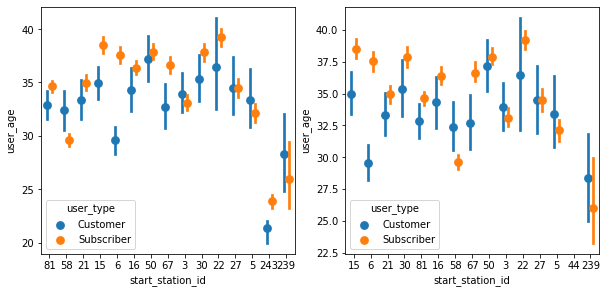

In [32]:
## Sub Plot For start and end locations (user type and age)
plt.figure(figsize = [10, 10])

plt.subplot (2,2,1)
freq_k = df_15['start_station_id'].value_counts()
gen_order_k = freq_k.index 
sb.pointplot(data = df_15, x = 'start_station_id', y ='user_age', hue = 'user_type',dodge = 0.3, linestyles = "" , order = gen_order_k)

plt.subplot (2,2,2)
freq_l = df_15['end_station_id'].value_counts()
gen_order_l = freq_l.index 
sb.pointplot(data = df_15, x = 'start_station_id', y ='user_age', hue = 'user_type',dodge = 0.3, linestyles = "" ,order = gen_order_l)



###  What are user gender and age for start and end locations ?

<AxesSubplot:xlabel='start_station_id', ylabel='user_age'>

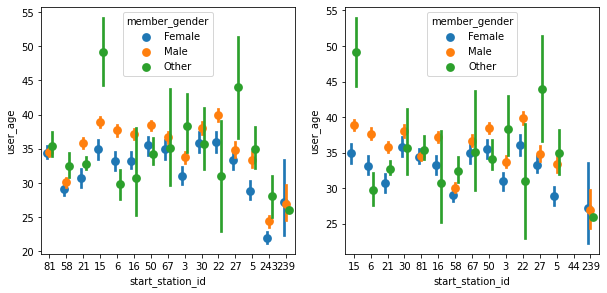

In [33]:
## Sub Plot For start and end locations (User gender and age)
plt.figure(figsize = [10, 10])

plt.subplot (2,2,1)
freq_k = df_15['start_station_id'].value_counts()
gen_order_k = freq_k.index 
sb.pointplot(data = df_15, x = 'start_station_id', y ='user_age', hue = 'member_gender',dodge = 0.3, linestyles = "" , order = gen_order_k)

plt.subplot (2,2,2)
freq_l = df_15['end_station_id'].value_counts()
gen_order_l = freq_l.index 
sb.pointplot(data = df_15, x = 'start_station_id', y ='user_age', hue = 'member_gender',dodge = 0.3, linestyles = "" ,order = gen_order_l)


### To Conclude :
 
The targeted customers characteristics :    

1- Gender : Male   .    
2- Type : Subscriber  .   
3- Age : 20 to 40 .    
4-  Most common trip hour from 1 to 2 hours .     

we checked and find these conclusion throw our journey thus we could get use of these by :
* For low density customers stations we can use these targeted customers in marketing and offers which will increase the revenue of the company.    
* For high density customers stations if there still work capicity available we can increase revenues by 2 ways :   
1- Offers for females between 20 to 40 years even for subscriber or customer type.   
2- More engagement for targeted customer with above characteristics .

## Tahnks :)